<a href="https://colab.research.google.com/github/cardstud/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
2 + 2

4

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

This is 911 data from Kaggle, which contains the following fields:
* lat: String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Imported my analytical and visual libraries

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Uploaded file and saved it as a dataframe, df2

In [0]:
from google.colab import files
uploaded = files.upload()


Saving 911.csv to 911 (1).csv


In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['911.csv']))

Check the shape

In [0]:
df2.shape

(99492, 9)

Check the info

In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Check the head of the first 3 rows

In [0]:
df2.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


Check the top 5 zipcodes for 911 calls.

In [0]:
df2['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Check the top 5 townships(twp) for 911 calls.

In [0]:
df2['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Check the number of unique title codes.

In [0]:
df2['title'].nunique()

110

Created new column called Reasons from splitting of title

In [0]:
df2['Reason'] = df2['title'].apply(lambda title: title.split(':')[0])

Found most common reason for calling 911

In [0]:
df2['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Created a countplot of 911 calls by Reason using seaborn

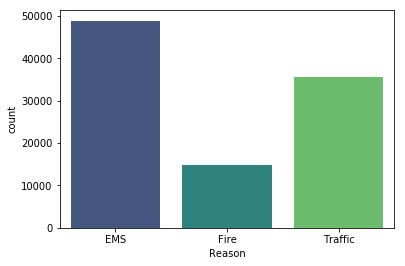

In [0]:
sns.countplot(x='Reason', data=df2, palette='viridis')

Using pd.to_datetime to conver the column from strings to DateTime objects

In [0]:
df2['timeStamp']=pd.to_datetime(df2['timeStamp'])

This allows the ability to grab specific attributes from a Datetime object by calling them, such as below:

In [0]:
df2['Hour'] = df2['timeStamp'].apply(lambda time:time.hour)
df2['Month']=df2['timeStamp'].apply(lambda time:time.month)
df2['Day of Week'] = df2['timeStamp'].apply(lambda time: time.dayofweek)

Since Day of Week is integer from 0-6, using .map function to map the actual string names to day of week

In [0]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [0]:
df2['Day of Week'] = df2['Day of Week'].map(dmap)

Created a countpot of Day of Week column with hue based on Reason column

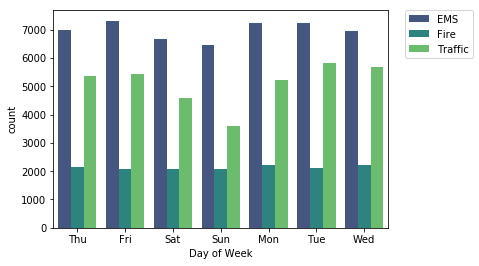

In [0]:
sns.countplot(x='Day of Week', data=df2, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

Same as above but for Month

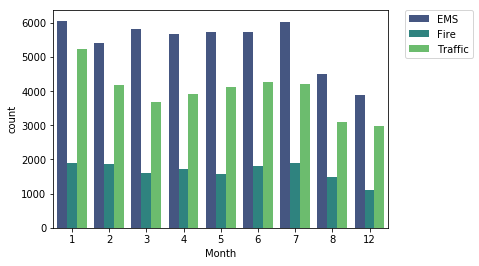

In [0]:
sns.countplot(x='Month', data=df2, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

Grouping DataFrame by the month column and using the count() method for aggregration, then returning the head

In [0]:
byMonth=df2.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timestamp,Hour,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


Simple plot of the above DataFrame indicating the count of the calls per month

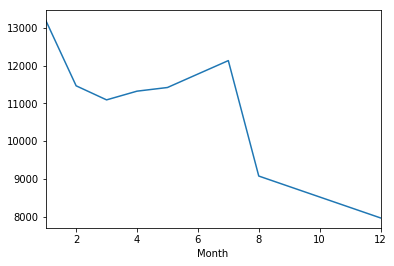

In [0]:
byMonth['twp'].plot()

Using lmplot() to create a linear fit on the number of calls per month

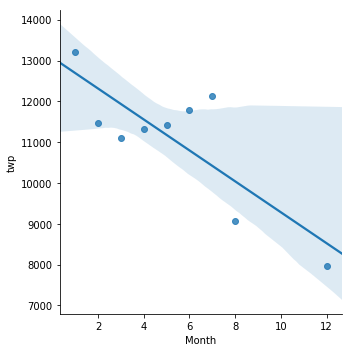

In [0]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

Created new column called Date that contains the date from the timeStamp column

In [0]:
df2['Date']=df2['timeStamp'].apply(lambda t: t.date())

Used groupby on Date column with the count() aggregate to create a plot of counts of 911 calls

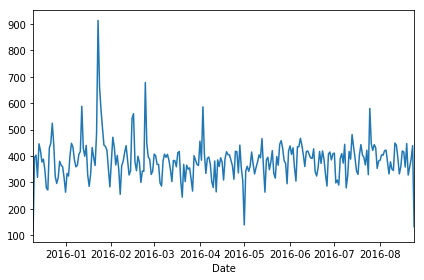

In [0]:
df2.groupby('Date').count()['twp'].plot()
plt.tight_layout()

Next 3 plots will represent a Reason for the 911 call

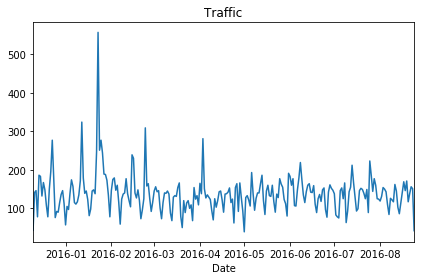

In [0]:
df2[df2['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

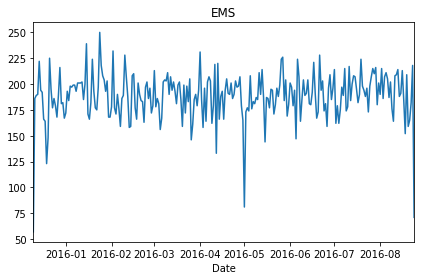

In [0]:
df2[df2['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

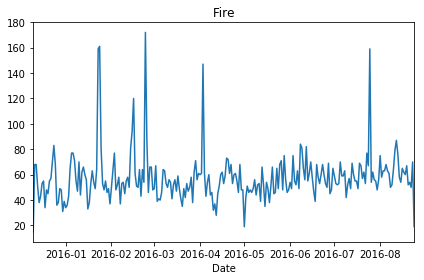

In [0]:
df2[df2['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

Restructured the DataFrame so columns become the Hours and the Index becomes the Day of Week

In [0]:
dayHour=df2.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,803,859,885,890,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,793,822,893,842,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,697,769,801,831,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,643,693,771,679,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,837,773,889,936,876,969,935,1013,810,698,617,553,424,354


HeatMap for the DataFrame

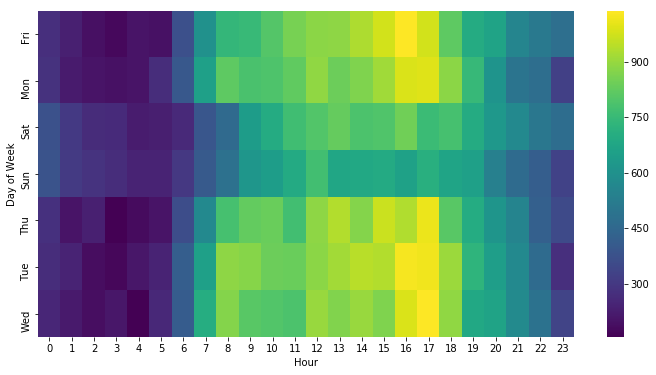

In [0]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

Clustermap using this DataFrame

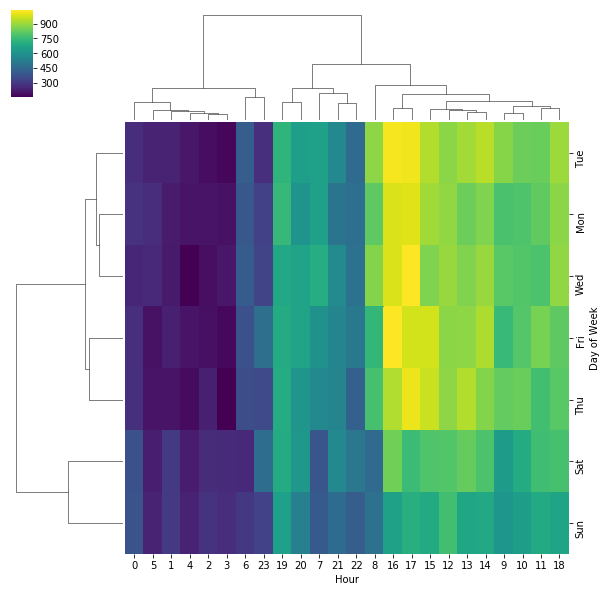

In [0]:
sns.clustermap(dayHour, cmap='viridis')

Repeating these plots for a DataFrame that shows the Month as the column

In [0]:
dayMonth=df2.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


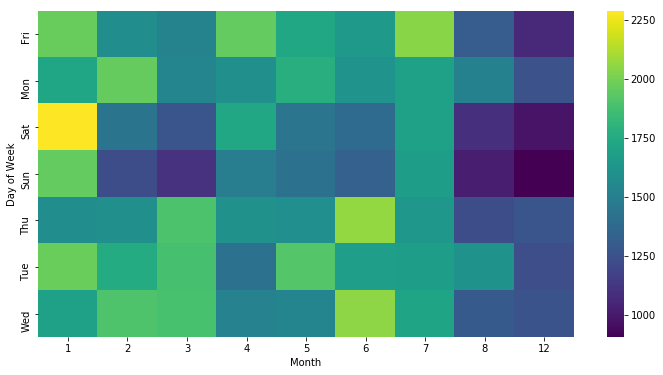

In [0]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

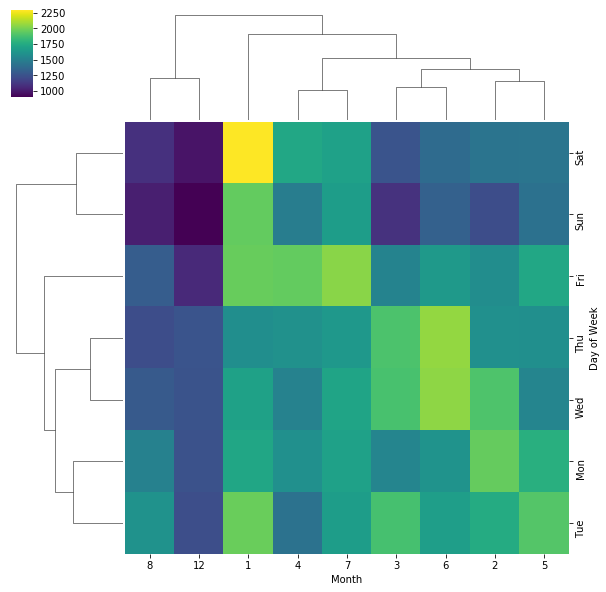

In [0]:
sns.clustermap(dayMonth,cmap='viridis')

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




1. Using the 911 dataset from Kaggle, I created a DataFrame, df2, and used Python's analytical and visual libraries to explore the data. I began by importing the data and saving it in a dataframe, df2. I then checked the shape, info and head of the DataFrame to get a brief view of my data. I checked a couple of basic questions on the dataset, such as top 5 zipcodes and townships for 911 calls and then checked to see how many unique 911 title codes there were. To make things more readable, I created a new column, called 'Reason', so I could explore the Reasons for calling 911. In order to retrieve specific attributes from the timeStamp column, I converted the timeStamp column from a string to a Date Time object. I also mapped the string names of the Day of Week column to the actual string names of the day of the week. Once finished preparing the data, I used seaborn to visually explore the data creating countplots of the Day of Week column and Month column to see how many of each Reason was attributed to that timeframe. I then created a groupby object, Month, whre I grouped the DataFrame by the month column to gather more info on the counts, using simple plots and countplots on the data. I think this data can be used with confidence if needed by the EMS community in those particular townships.

2. The most challenging part was trying to understand what was being shown and then connecting how it was done. Splitting the title into two separate categories was confusing at first but made much more sense based on what data was being explored and visualized.

3. The most interesting thing I learned was how a dataset can really be manipulated in such as way that you are able to access relevant information so precisely to answer specific questions, which is useful in the real-world cases, such as this one.

4. I think using models is relatively easy since the computers do most of the work. The hard part is accessing and preparing your data in such a way that you can answer a plethora of questions with confidence. I think if I had more time, I would want to learn more on how to retrieve and prepare data for exploration so that the "quantification of data" is done correctly.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.